MOBILE PRICE CLASSIFICATION USING ARTIFICIAL NEURAL NETWORK

In [210]:
import numpy as np
import pandas as pd

Loading and analysing the data

In [211]:
data=pd.read_csv('/content/mobile_price_classification.csv')
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [212]:
data.shape

(2000, 21)

In [213]:
data.isna().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [214]:
data.dtypes

battery_power       int64
bluetooth           int64
clock_speed       float64
dual_sim            int64
front_cam           int64
4G                  int64
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
primary_camera      int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g             int64
touch_screen        int64
wifi                int64
price_range         int64
dtype: object

no NaN and categorical parameters

In [215]:
data['price_range'].unique()

array([1, 2, 3, 0])

Since the target column contain 4 values, this is a case of multi-class classification

In [216]:
data.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [217]:
x=data.drop('price_range',axis=1)
y=data['price_range']

In [218]:
x.shape

(2000, 20)

In [219]:
x = x.values

In [220]:
from sklearn.preprocessing import StandardScaler # scaling the features using standard scalar
sc = StandardScaler()
x = sc.fit_transform(x)

In [221]:
y = y.values

In [222]:
y = y.reshape(-1,1)

In [223]:
from sklearn.preprocessing import OneHotEncoder # encoding the target column using one-hot encoder
onehot = OneHotEncoder()
y = onehot.fit_transform(y)

In [224]:
y = y.toarray()

In [225]:
# splitting the data to  train and test datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [226]:
x_train.shape

(1500, 20)

**Modelling ANN**
Since it is a multi-class classification, activation function for output layer= softmax and loss function = categorical_cross entropy

In [227]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [228]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [229]:
history=model.fit(x_train,y_train,epochs=100)
y_pred=model.predict(x_test)

Epoch 1/100
47/47 [==============================] - 1s 4ms/step - loss: 1.4391 - accuracy: 0.2580
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 1.3926 - accuracy: 0.2827
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 1.3645 - accuracy: 0.3120
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 1.3383 - accuracy: 0.3467
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 1.3070 - accuracy: 0.3867
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 1.2665 - accuracy: 0.4287
Epoch 7/100
47/47 [==============================] - 0s 3ms/step - loss: 1.2169 - accuracy: 0.4733
Epoch 8/100
47/47 [==============================] - 0s 3ms/step - loss: 1.1582 - accuracy: 0.5153
Epoch 9/100
47/47 [==============================] - 0s 3ms/step - loss: 1.0939 - accuracy: 0.5513
Epoch 10/100
47/47 [==============================] - 0s 3ms/step - loss: 1.0291 - accuracy: 0.5880
Epoch 11/

In [230]:
(y_pred)

array([[9.9843478e-01, 1.5651501e-03, 5.6031190e-11, 7.3176021e-09],
       [1.9901639e-12, 1.6951789e-04, 9.9929667e-01, 5.3382316e-04],
       [1.2185945e-03, 9.9838024e-01, 3.1798033e-04, 8.3088053e-05],
       ...,
       [4.8259606e-13, 7.8485891e-06, 9.7894806e-01, 2.1044057e-02],
       [3.8329112e-26, 4.6695826e-18, 5.3052077e-06, 9.9999464e-01],
       [4.0668696e-02, 9.5931804e-01, 4.6458272e-06, 8.5837637e-06]],
      dtype=float32)

In [231]:
y_pred[y_pred>0.5]=1
y_pred[y_pred<0.5]=0

In [232]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.952

Accuracy =95.2%

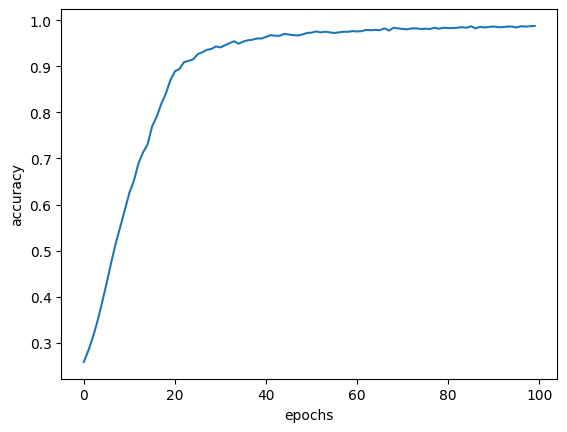

In [233]:
# plotting
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()